In [2]:
from seirsplus.models import *
from seirsplus.networks import *
import networkx

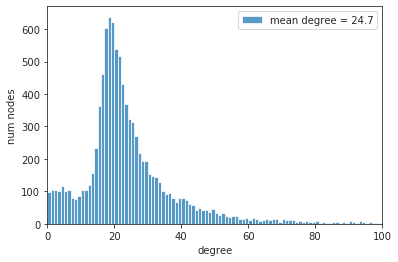

In [45]:
# numNodes = 10000
baseGraph    = networkx.barabasi_albert_graph(n=numNodes, m=22)
# Baseline normal interactions:
G_normal     = custom_exponential_graph(baseGraph, scale=100)
plot_degree_distn(G_normal, max_degree=100)

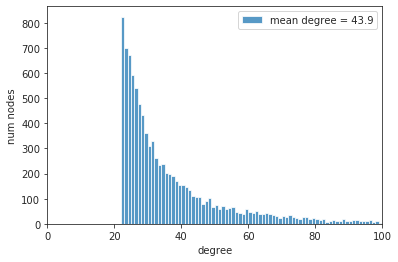

In [46]:
plot_degree_distn(baseGraph, max_degree=100)

In [47]:
print(G_normal.number_of_edges())

123288


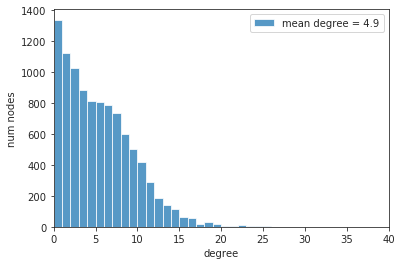

24602

In [17]:
# Social distancing interactions:
G_distancing = custom_exponential_graph(baseGraph, scale=10)
plot_degree_distn(G_distancing, max_degree=40)
G_distancing.number_of_edges()

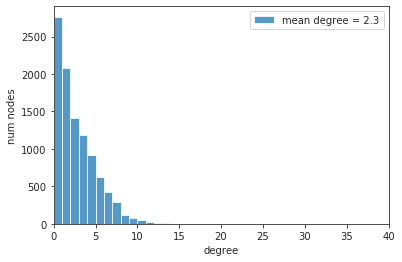

11255

In [19]:
# Quarantine interactions:
G_quarantine = custom_exponential_graph(baseGraph, scale=5)
plot_degree_distn(G_quarantine, max_degree=40)
G_quarantine.number_of_edges()

In [20]:
SIGMA  = 1/5.2
GAMMA  = 1/10
MU_I   = 0.002

R0     = 2.5
BETA   = 1/(1/GAMMA) * R0
BETA_Q = 0.5*BETA

P      = 0.2
Q      = 0.05

In [21]:
model = SEIRSNetworkModel(G       = G_normal, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          mu_I    = MU_I,
                          mu_0    = 0, 
                          nu      = 0, 
                          xi      = 0,
                          p       = P,
                          G_Q     = G_quarantine, 
                          beta_Q  = BETA_Q, 
                          sigma_Q = SIGMA,
                          gamma_Q = GAMMA, 
                          mu_Q    = MU_I,
                          theta_E = 0, 
                          theta_I = 0, 
                          phi_E   = 0, 
                          phi_I   = 0, 
                          psi_E   = 1.0, 
                          psi_I   = 1.0,
                          q       = Q,
                          initI   = numNodes/100, 
                          initE   = 0, 
                          initQ_E = 0, 
                          initQ_I = 0, 
                          initR   = 0, 
                          initF   = 0)

In [22]:
checkpoints = {'t':       [20, 100], 
               'G':       [G_distancing, G_normal], 
               'p':       [0.5*P, P], 
               'theta_E': [0.02, 0.02], 
               'theta_I': [0.02, 0.02], 
               'phi_E':   [0.2, 0.2], 
               'phi_I':   [0.2, 0.2]}

In [23]:
model.run(T=300, checkpoints=checkpoints)

t = 0.01
t = 10.01
[Checkpoint: Updating parameters]
t = 20.01
t = 30.00
t = 40.01
t = 50.02
t = 60.00
t = 70.02
t = 80.02
t = 90.00
[Checkpoint: Updating parameters]
t = 100.02
t = 110.02
t = 120.01
t = 130.02
t = 140.02
t = 150.03
t = 160.15
t = 170.02
t = 180.02
t = 190.38
t = 200.12
t = 210.28
t = 220.08
t = 230.03
t = 240.05
t = 250.25
t = 260.71
t = 270.83
t = 290.25


True

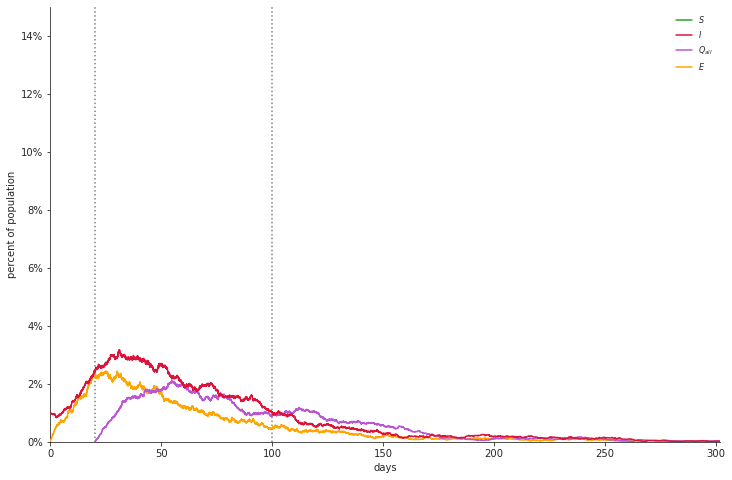

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbd2a117e10>)

In [24]:
model.figure_basic(vlines=checkpoints['t'], ylim=0.15)

In [25]:
model = SEIRSNetworkModel(G=G_normal, beta=0.95, sigma=0.8, gamma=0.2, initE= 1500, initI = 300)

In [26]:
model.run(T=300)

t = 0.00
t = 10.00
t = 20.02
t = 30.07
t = 40.69
t = 50.49


True

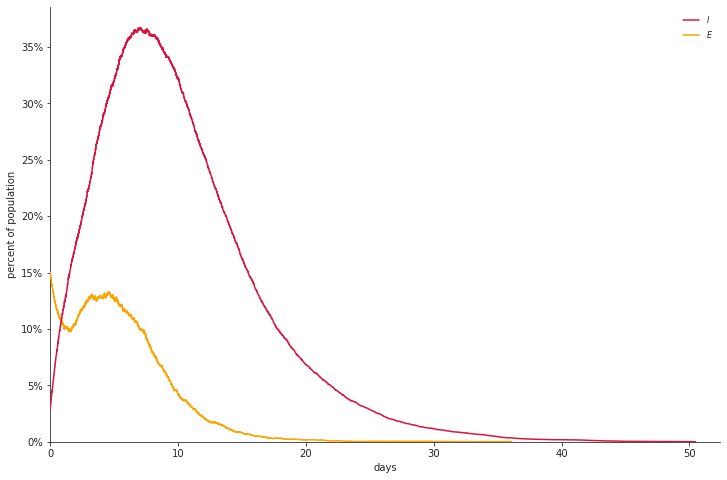

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbd319f6810>)

In [27]:
model.figure_basic(plot_S = 'False')

In [36]:
model = SEIRSNetworkModel(G=baseGraph, beta=0.95, sigma=0.8, gamma=0.2, initE= 1500, initI = 300)

In [37]:
model.run(T=300)

t = 0.00
t = 10.00
t = 20.01
t = 30.00
t = 40.22


True

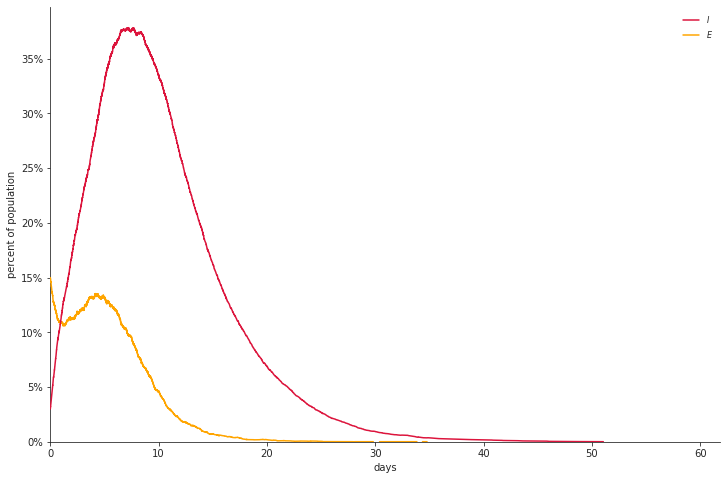

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbd28fabb90>)

In [38]:
model.figure_basic(plot_S = 'False')

In [10]:
ref_model = SEIRSNetworkModel(G=G_normal, beta=BETA, sigma=SIGMA, gamma=GAMMA, mu_I=MU_I, p=P,
                              G_Q=G_quarantine, beta_Q=BETA_Q, sigma_Q=SIGMA, gamma_Q=GAMMA, mu_Q=MU_I,
                              theta_E=0, theta_I=0, phi_E=0, phi_I=0, psi_E=1.0, psi_I=1.0, q=Q,
                              initI=numNodes/100)
ref_model.run(T=300)

t = 0.02
t = 10.04
t = 20.02
t = 30.01
t = 40.01
t = 50.01
t = 60.00
t = 70.00
t = 80.00
t = 90.01
t = 100.00
t = 110.06
t = 120.02
t = 130.17
t = 140.02
t = 150.54
t = 170.43
t = 180.76
t = 190.54


True

/usr/local/lib/python3.8/site-packages/seirsplus/models.py:1538: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


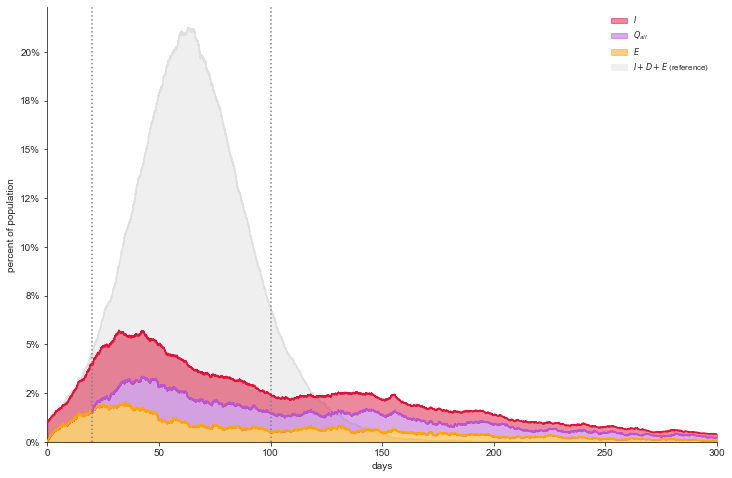

(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='days', ylabel='percent of population'>)

In [11]:
model.figure_infections(vlines=checkpoints['t'], shaded_reference_results=ref_model)

In [12]:
ref_model_determ = SEIRSModel(beta=BETA, sigma=SIGMA, gamma=GAMMA, mu_I=MU_I, initI=100, initN=10000) 
ref_model_determ.run(T=300)

t = 299.90


True

/usr/local/lib/python3.8/site-packages/seirsplus/models.py:1538: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


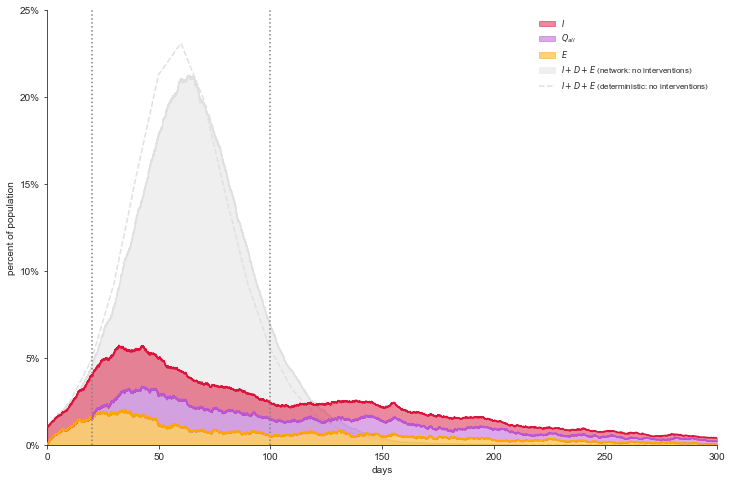

(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='days', ylabel='percent of population'>)

In [13]:
model.figure_infections(vlines=checkpoints['t'], ylim=0.25, 
                        shaded_reference_results=ref_model, shaded_reference_label='network: no interventions',
                        dashed_reference_results=ref_model_determ, dashed_reference_label='deterministic: no interventions')